<a href="https://colab.research.google.com/github/yankit247/Instagram-Reach-anaylsis/blob/main/instagram_reach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

"Comprehensive Instagram Reach Analysis and Prediction Using Python: Unveiling Insights, Content Strategies, and Machine Learning Models"

Instagram Reach Analysis: Examines reach distribution, content insights, and relationships.
Content Exploration: Utilizes WordCloud for captions and hashtags, providing visual insights.
Machine Learning Prediction: Develops a model predicting reach, empowering content creators with valuable performance insights.






   Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0         3920       2586           1028           619          56     98   
1         5394       2727           1838          1174          78    194   
2         4021       2085           1188             0         533     41   
3         4528       2700            621           932          73    172   
4         2518       1704            255           279          37     96   

   Comments  Shares  Likes  Profile Visits  Follows  \
0         9       5    162              35        2   
1         7      14    224              48       10   
2        11       1    131              62       12   
3        10       7    213              23        8   
4         5       4    123               8        0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learni

<ipython-input-1-2b96bc68b25a>:28: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['From Home'])


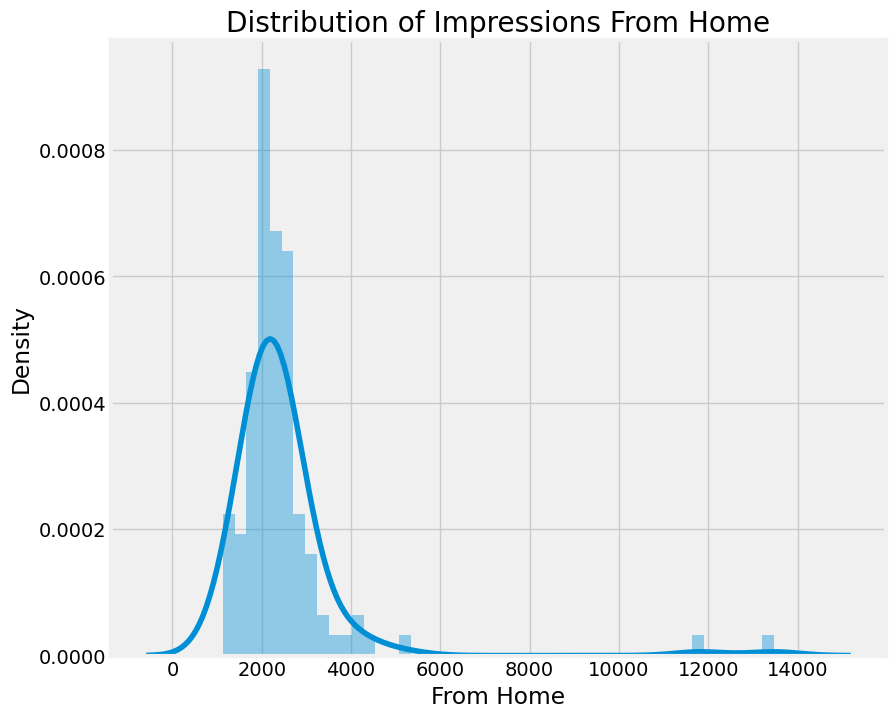

<ipython-input-1-2b96bc68b25a>:34: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['From Hashtags'])


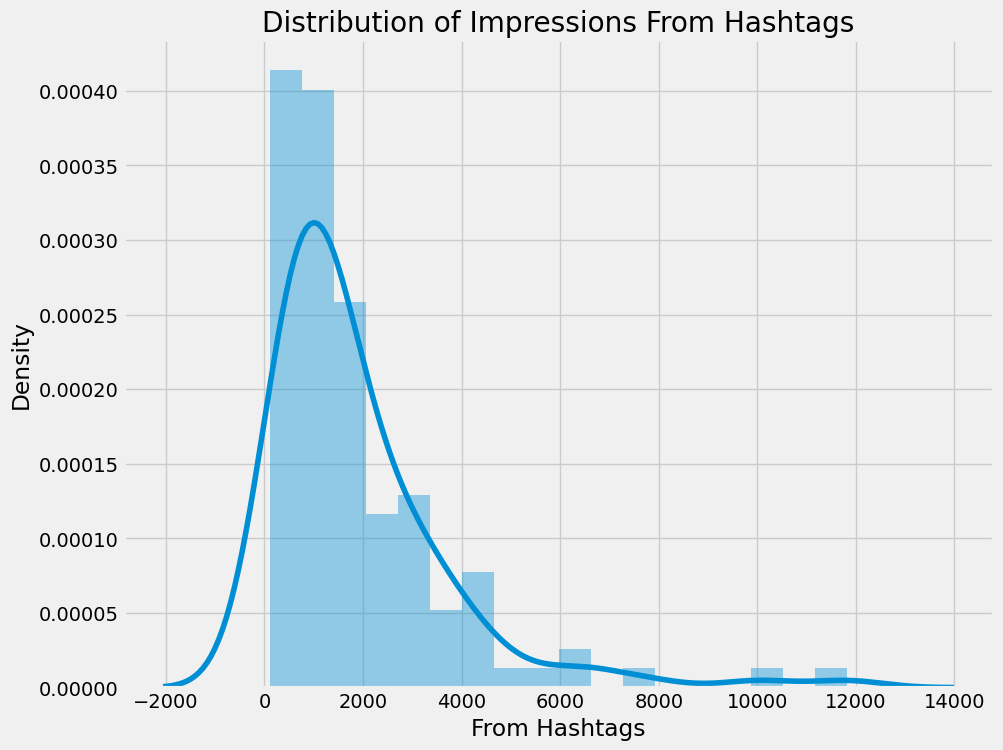

<ipython-input-1-2b96bc68b25a>:40: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['From Explore'])


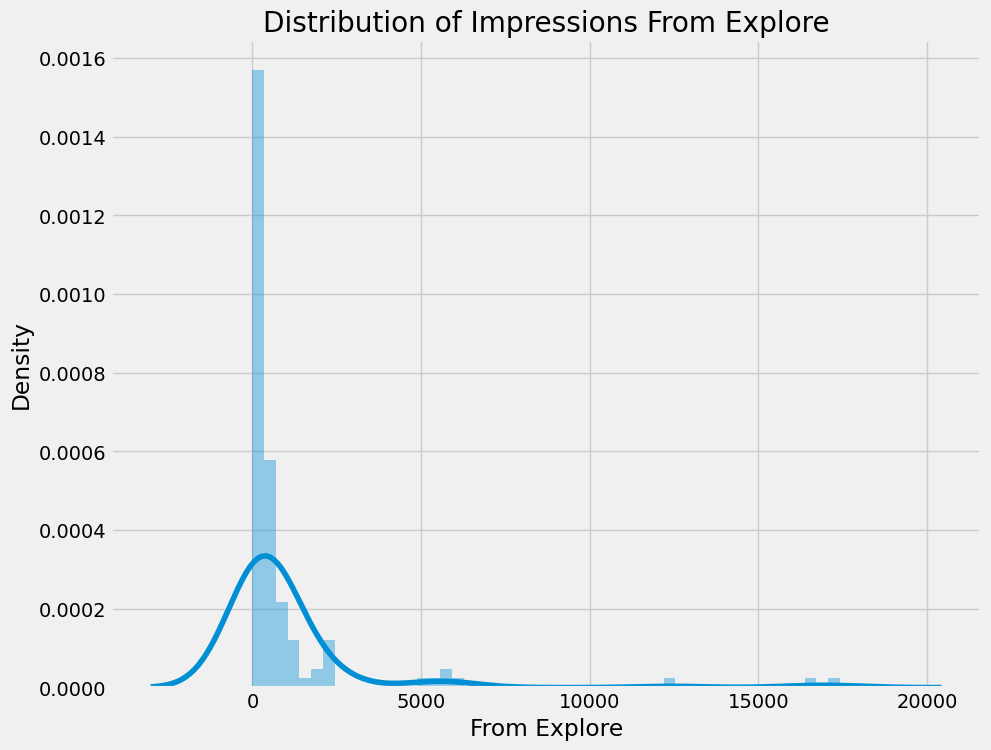

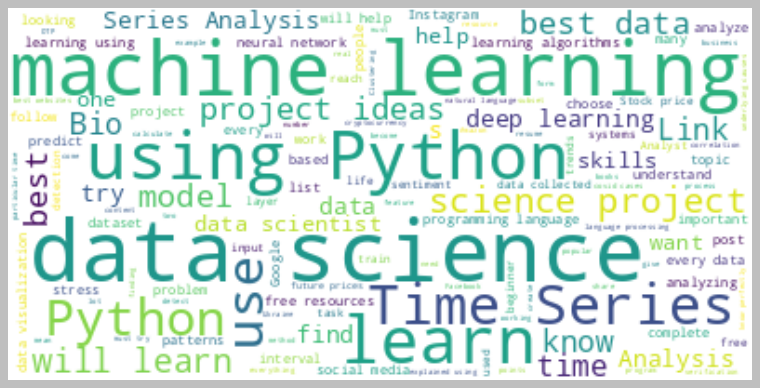

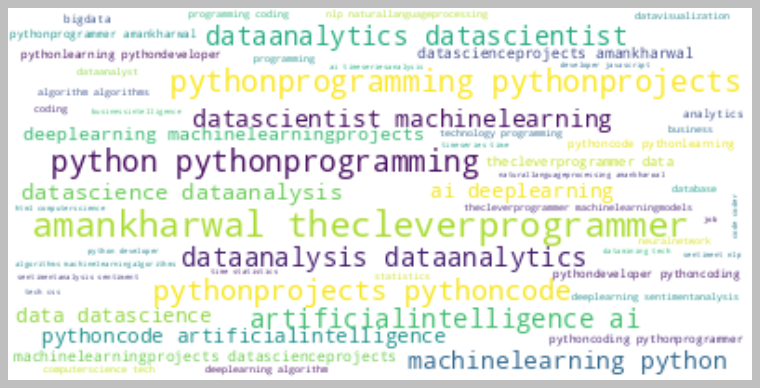

Impressions       1.000000
From Explore      0.893607
Follows           0.889363
Likes             0.849835
From Home         0.844698
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
From Other        0.592960
From Hashtags     0.560760
Comments         -0.028524
Name: Impressions, dtype: float64
41.00265604249668


<ipython-input-1-2b96bc68b25a>:96: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Model Score: 0.6323400391211174
Predicted Reach: 9477.854151385804


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor

# Import the dataset
data = pd.read_csv("Instagram.csv", encoding='latin1')
print(data.head())

# Check for null values
print(data.isnull().sum())

# Drop rows with null values
data = data.dropna()

# Display data information
print(data.info())

# Analyzing Instagram Reach
# Distribution of Impressions From Home
plt.figure(figsize=(10, 8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From Home")
sns.distplot(data['From Home'])
plt.show()

# Distribution of Impressions From Hashtags
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Hashtags")
sns.distplot(data['From Hashtags'])
plt.show()

# Distribution of Impressions From Explore
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Explore")
sns.distplot(data['From Explore'])
plt.show()

# Percentage of Impressions From Various Sources
home = data["From Home"].sum()
hashtags = data["From Hashtags"].sum()
explore = data["From Explore"].sum()
other = data["From Other"].sum()

labels = ['From Home', 'From Hashtags', 'From Explore', 'Other']
values = [home, hashtags, explore, other]

fig = px.pie(data, values=values, names=labels, title='Impressions on Instagram Posts From Various Sources', hole=0.5)
fig.show()

# Analyzing Content
# WordCloud of the Caption column
text_caption = " ".join(i for i in data.Caption)
stopwords = set(STOPWORDS)
wordcloud_caption = WordCloud(stopwords=stopwords, background_color="white").generate(text_caption)
plt.style.use('classic')
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud_caption, interpolation='bilinear')
plt.axis("off")
plt.show()

# WordCloud of the Hashtags column
text_hashtags = " ".join(i for i in data.Hashtags)
wordcloud_hashtags = WordCloud(stopwords=stopwords, background_color="white").generate(text_hashtags)
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud_hashtags, interpolation='bilinear')
plt.axis("off")
plt.show()

# Analyzing Relationships
# Relationship Between Likes and Impressions
figure_likes = px.scatter(data_frame=data, x="Impressions", y="Likes", size="Likes", trendline="ols",
                          title="Relationship Between Likes and Impressions")
figure_likes.show()

# Relationship Between Comments and Impressions
figure_comments = px.scatter(data_frame=data, x="Impressions", y="Comments", size="Comments", trendline="ols",
                             title="Relationship Between Comments and Total Impressions")
figure_comments.show()

# Relationship Between Shares and Impressions
figure_shares = px.scatter(data_frame=data, x="Impressions", y="Shares", size="Shares", trendline="ols",
                            title="Relationship Between Shares and Total Impressions")
figure_shares.show()

# Relationship Between Saves and Impressions
figure_saves = px.scatter(data_frame=data, x="Impressions", y="Saves", size="Saves", trendline="ols",
                           title="Relationship Between Post Saves and Total Impressions")
figure_saves.show()

# Correlation of columns with Impressions
correlation = data.corr()
print(correlation["Impressions"].sort_values(ascending=False))

# Analyzing Conversion Rate
# Conversion Rate Calculation
conversion_rate = (data["Follows"].sum() / data["Profile Visits"].sum()) * 100
print(conversion_rate)

# Relationship Between Profile Visits and Followers Gained
figure_conversion_rate = px.scatter(data_frame=data, x="Profile Visits", y="Follows", size="Follows", trendline="ols",
                                    title="Relationship Between Profile Visits and Followers Gained")
figure_conversion_rate.show()

# Instagram Reach Prediction Model
# Splitting data into training and test sets
x = np.array(data[['Likes', 'Saves', 'Comments', 'Shares', 'Profile Visits', 'Follows']])
y = np.array(data["Impressions"])
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

# Training a machine learning model
model = PassiveAggressiveRegressor()
model.fit(xtrain, ytrain)
print("Model Score:", model.score(xtest, ytest))

# Predicting reach for new data
features = np.array([[282.0, 233.0, 4.0, 9.0, 165.0, 54.0]])
prediction = model.predict(features)
print("Predicted Reach:", prediction[0])
